In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

# load the dataset using the builtin Keras method (X_train: images, y_train: labels)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train_new = np.array([])
y_test_new = np.array([])

for i in y_train:
    if i == 1 or i == 7:
        i = 'vertical digits'
    elif i == 0 or i == 6 or i == 8 or i == 9:
        i = 'loopy digits'
    elif i == 2 or i == 5:
        i = 'curly digits'
    elif i == 3 or i == 4:
        i = 'other'
    y_train_new = np.append(y_train_new, i)
    
for i in y_test:
    if i == 1 or i == 7:
        i = 'vertical digits'
    elif i == 0 or i == 6 or i == 8 or i == 9:
        i = 'loopy digits'
    elif i == 2 or i == 5:
        i = 'curly digits'
    elif i == 3 or i == 4:
        i = 'other'
    y_test_new = np.append(y_test_new, i)

y_train_n = y_train_new    
y_test_n = y_test_new
#y_train_n = y_train_new.astype(np.uint8)
#y_test_n = y_test_new.astype(np.uint8)

In [2]:
print(y_train_n.shape)
print('Dimensionality of the training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)
print()
print(y_test_n.shape)
print('Dimensionality of the test image dataset and labels:')
print(X_test.shape)
print(y_test.shape)

(60000,)
Dimensionality of the training image dataset and labels:
(60000, 28, 28)
(60000,)

(10000,)
Dimensionality of the test image dataset and labels:
(10000, 28, 28)
(10000,)


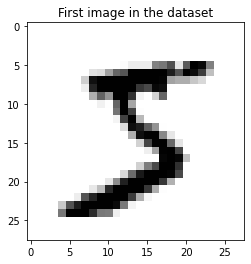

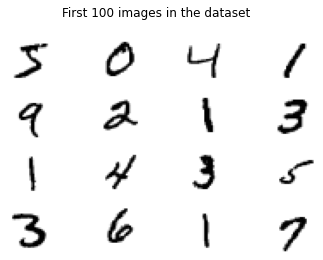

In [3]:
# show the first image in the dataset
plt.figure()
plt.imshow(X_train[0], cmap='gray_r', vmin=0, vmax=255)
plt.title('First image in the dataset')

# show the first 16 images in the dataset in a 4x4 gird
fig = plt.figure()
for n in range(16):
    ax = fig.add_subplot(4, 4, n + 1)
    plt.imshow(X_train[n], cmap='gray_r', vmin=0, vmax=255)
    plt.axis('off')
fig.suptitle('First 100 images in the dataset')
plt.show()

In [4]:
# print the labels of the first 16 images in the dataset
print('Labels of the first 16 images in the dataset:')
print(y_train[:16])
print(y_train_n[:16])
print(y_test[:16])
print(y_test_n[:16])

# derive a validation set from the training set
# the original training set is split into
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train_n, y_val_n = train_test_split(y_train_n, test_size=0.10, random_state=101)

print('Dimensionality of the new training image dataset and labels:')
print(X_train.shape)
print(y_train_n.shape)

print('Dimensionality of the validation image dataset and labels:')
print(X_val.shape)
print(y_val_n.shape)

Labels of the first 16 images in the dataset:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]
['curly digits' 'loopy digits' 'other' 'vertical digits' 'loopy digits'
 'curly digits' 'vertical digits' 'other' 'vertical digits' 'other'
 'other' 'curly digits' 'other' 'loopy digits' 'vertical digits'
 'vertical digits']
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]
['vertical digits' 'curly digits' 'vertical digits' 'loopy digits' 'other'
 'vertical digits' 'other' 'loopy digits' 'curly digits' 'loopy digits'
 'loopy digits' 'loopy digits' 'loopy digits' 'loopy digits'
 'vertical digits' 'curly digits']
Dimensionality of the new training image dataset and labels:
(54000, 28, 28)
(54000,)
Dimensionality of the validation image dataset and labels:
(6000, 28, 28)
(6000,)


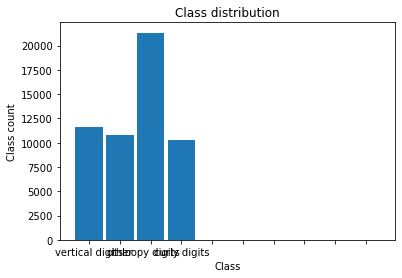

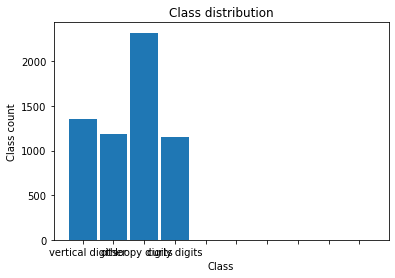

In [5]:
def plt_classes(y, num_class=10):
    plt.figure()
    plt.hist(y, bins=range(0, num_class + 1), align='left', rwidth=0.9)
    plt.xlabel('Class')
    plt.ylabel('Class count')
    plt.xticks(range(0, num_class))
    plt.title('Class distribution')


# show the class label distribution in the training dataset
plt_classes(y_train_n)

# show the class label distribution in the validation dataset
plt_classes(y_val_n)

In [6]:
# the shape of the data matrix is NxHxW, where N is the number of images, H and W are the height and width of the images
# keras expect the data to have shape NxHxWxC, where C is the channel dimension
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_val = np.reshape(X_val, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))
# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

In [7]:
# class label preprocessing for keras

# we see that we have a 1D-array with length 54000
print(y_train_n.shape)

# since we have 4 different classes, what does this array look like?
# let's look at the first 20 labels
print(y_train_n[:20])

y_train_new = np.array([])
y_val_new = np.array([])
y_test_new = np.array([])
# convert 1D class arrays to 4D class matrices
for i in y_train_n:
    if i == 'vertical digits':
        i = 1
    elif i == 'loopy digits':
        i = 0
    elif i == 'curly digits':
        i = 2
    elif i == 'other':
        i = 3
    y_train_new = np.append(y_train_new, i)
    
for i in y_val_n:
    if i == 'vertical digits':
        i = 1
    elif i == 'loopy digits':
        i = 0
    elif i == 'curly digits':
        i = 2
    elif i == 'other':
        i = 3
    y_val_new = np.append(y_val_new, i)
    
for i in y_test_n:
    if i == 'vertical digits':
        i = 1
    elif i == 'loopy digits':
        i = 0
    elif i == 'curly digits':
        i = 2
    elif i == 'other':
        i = 3
    y_test_new = np.append(y_test_new, i)

y_train_n = to_categorical(y_train_new, 4)
y_val_n = to_categorical(y_val_new, 4)
y_test_n = to_categorical(y_test_new, 4)

# check the output
print(y_train_n.shape)
# this is now a one-hot encoded matrix
print(y_train_n[:20])

(54000,)
['vertical digits' 'other' 'loopy digits' 'curly digits' 'vertical digits'
 'loopy digits' 'vertical digits' 'curly digits' 'loopy digits'
 'loopy digits' 'vertical digits' 'loopy digits' 'loopy digits'
 'curly digits' 'vertical digits' 'curly digits' 'other' 'curly digits'
 'vertical digits' 'curly digits']
(54000, 4)
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [8]:
model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28, 28, 1)))
# ten fully connected layers with 128 neurons and ReLU nonlinearity (optimal amount found in exercise 1)
for i in range(0,10):
    model.add(Dense(128, activation='relu'))           
# output layer with 4 nodes (one for each class) and softmax nonlinearity
model.add(Dense(4, activation='softmax'))

In [9]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name = "exercise_3_3"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model.fit(X_train, y_train_n, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_n),
          callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.0401 - accuracy: 0.5342 - val_loss: 0.2795 - val_accuracy: 0.9100
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2263 - accuracy: 0.9250 - val_loss: 0.2307 - val_accuracy: 0.9205
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1436 - accuracy: 0.9531 - val_loss: 0.1291 - val_accuracy: 0.9563
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1033 - accuracy: 0.9677 - val_loss: 0.1181 - val_accuracy: 0.9615
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0810 - accuracy: 0.9750 - val_loss: 0.1075 - val_accuracy: 0.9688
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0670 - accuracy: 0.9790 - val_loss: 0.1047 - val_accuracy: 0.9672
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.1164 - val_accuracy:

In [10]:
score = model.evaluate(X_test, y_test_n, verbose=0)

print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.09343879669904709
Accuracy:  0.9711999893188477
